In [142]:
########      Phase 0 & 1 ########

In [143]:
### Import libraries

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
### Load the dataset

In [146]:
import os
print(os.getcwd())

c:\Users\dell\Desktop\Customer_review_NLP_Pipeline\customer-review-nlp-pipeline\notebooks


In [147]:
%pip install openpyxl


Note: you may need to restart the kernel to use updated packages.


In [148]:
df= pd.read_excel("../data/Womens Clothing Reviews Data.xlsx")

In [149]:
### BASIC DATA CHECKS (MANDATORY)

In [150]:
# First 5 rows
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


In [151]:
# Shape of dataset
df.shape

(23486, 11)

In [152]:
# Column Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product ID      23486 non-null  int64 
 1   Category        23472 non-null  object
 2   Subcategory1    23472 non-null  object
 3   SubCategory2    23472 non-null  object
 4   Location        23486 non-null  object
 5   Channel         23486 non-null  object
 6   Customer Age    23486 non-null  int64 
 7   Review Title    19676 non-null  object
 8   Review Text     22641 non-null  object
 9   Rating          23486 non-null  int64 
 10  Recommend Flag  23486 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.0+ MB


In [153]:
# Missing Values (if any)
df.isnull().sum()

Product ID           0
Category            14
Subcategory1        14
SubCategory2        14
Location             0
Channel              0
Customer Age         0
Review Title      3810
Review Text        845
Rating               0
Recommend Flag       0
dtype: int64

In [154]:
# Column name spaces (VERY COMMON)
# Excel often contains leading/trailing spaces in column names,which can cause errors during analysis.

In [155]:
df.columns = df.columns.str.strip()

In [156]:
df.columns

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag'],
      dtype='object')

In [157]:

##### Phase 2  ######

#  Exploratory Data Analysis



In [158]:
# 1️. Rating Distribution -- How satified are customers overall?

In [159]:
df['Rating'].value_counts().sort_index()

Rating
1      842
2     1565
3     2871
4     5077
5    13131
Name: count, dtype: int64

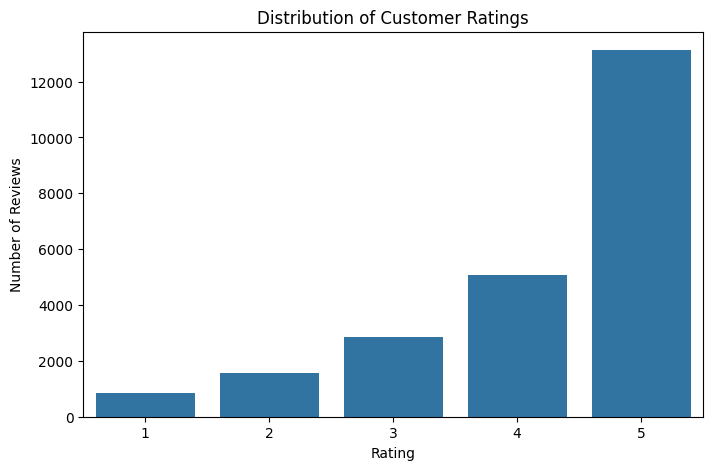

In [160]:
plt.figure(figsize=(8,5))
sns.countplot(x='Rating', data=df)
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.show()

In [161]:
## 2. AGE vs RATING -- Do customers of different age groups rate products differently?

In [162]:
# Age Summary
df['Customer Age'].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Customer Age, dtype: float64

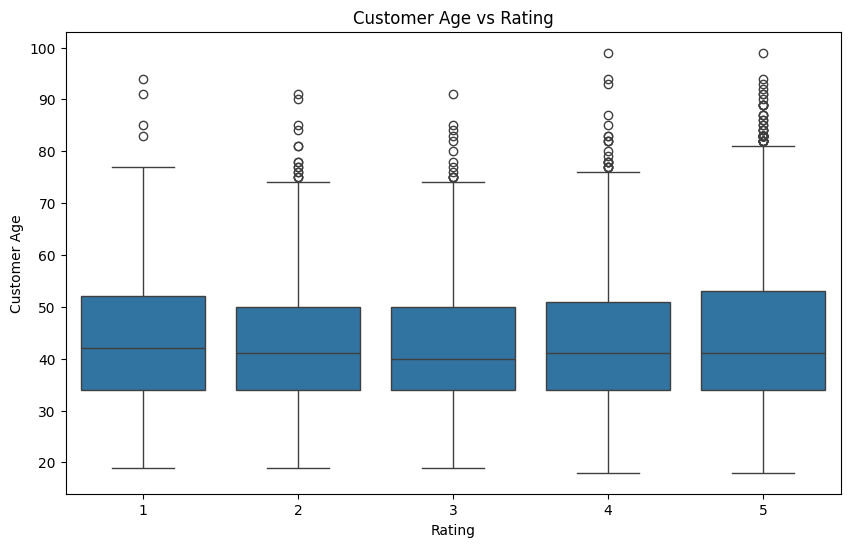

In [163]:
# Boxplot (Age vs Rating)
plt.figure(figsize=(10,6))
sns.boxplot(x='Rating', y='Customer Age', data=df)
plt.title("Customer Age vs Rating")
plt.xlabel("Rating")
plt.ylabel("Customer Age")
plt.show()

In [164]:
## Average rating by age
df.groupby('Customer Age')['Rating'].mean().head()

Customer Age
18    4.500000
19    4.200000
20    4.361111
21    4.450980
22    4.465753
Name: Rating, dtype: float64

In [165]:
## 3. CATEGORY & SUBCATEGORY ANALYSIS -- Which product categories perform well or poorly?

In [166]:
# Review count by category
df['Category'].value_counts()

Category
General           13850
General Petite     8120
Initmates          1502
Name: count, dtype: int64

In [167]:
# Average rating by category
category_rating = (
    df.groupby('Category')['Rating']
      .mean()
      .sort_values(ascending=False)
)

In [168]:
category_rating

Category
Initmates         4.286285
General Petite    4.211084
General           4.176606
Name: Rating, dtype: float64

In [169]:
# Plot average rating by category

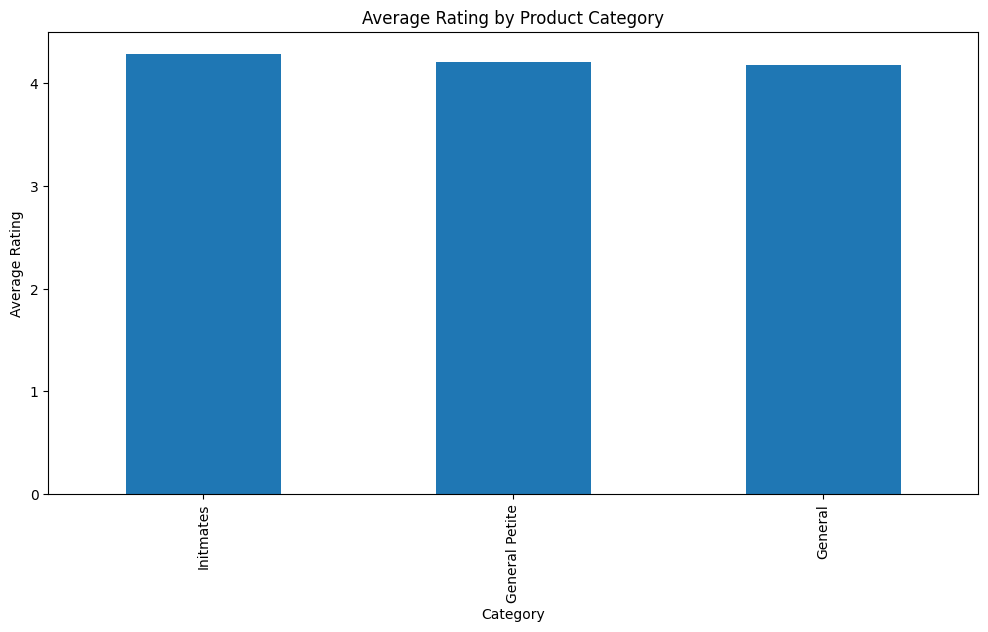

In [170]:
plt.figure(figsize=(12,6))
category_rating.plot(kind='bar')
plt.title("Average Rating by Product Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.show()

In [171]:
# Subcategory Analysis
df.groupby('Subcategory1')['Rating'].mean().sort_values(ascending=False).head(10)

Subcategory1
Bottoms     4.288760
Intimate    4.280115
Jackets     4.264535
Tops        4.172239
Dresses     4.150815
Trend       3.815126
Name: Rating, dtype: float64

In [172]:
## 4. LOCATION & CHANNEL ANALYSIS 

In [173]:
## For Locations -- Does customer satisfaction vary by location?

In [174]:
# Reviews by location
df['Location'].value_counts().head(10)

Location
Gurgaon      8821
Mumbai       7112
Bangalore    5224
Chennai      2329
Name: count, dtype: int64

In [175]:
# Average rating by location
df.groupby('Location')['Rating'].mean().sort_values(ascending=False).head(10)

Location
Mumbai       4.205990
Chennai      4.199227
Gurgaon      4.191928
Bangalore    4.187979
Name: Rating, dtype: float64

In [176]:
## For Channels - Is customer experience different on web vs mobile?

In [177]:
# Channel distribution
df['Channel'].value_counts()

Channel
Web       13583
Mobile     9903
Name: count, dtype: int64

In [178]:
# Channel vs rating
df.groupby('Channel')['Rating'].mean()

Channel
Mobile    4.215389
Web       4.181919
Name: Rating, dtype: float64

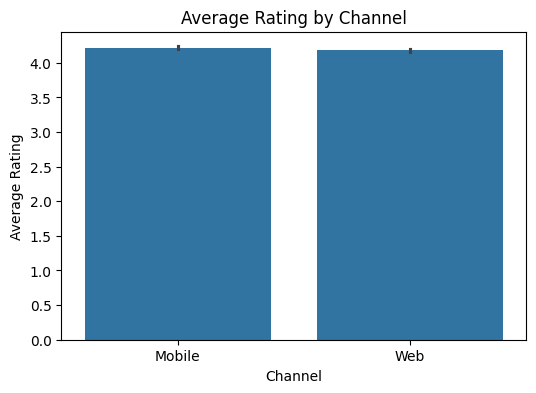

In [179]:
# Channel rating plot
plt.figure(figsize=(6,4))
sns.barplot(x='Channel', y='Rating', data=df)
plt.title("Average Rating by Channel")
plt.xlabel("Channel")
plt.ylabel("Average Rating")
plt.show()

In [180]:
######       PHASE:3 Text Analysis & Sentiment Analysis   ######
# (We start with TEXT ANALYSIS first, sentiment comes later)

#  According to your project includes :
        # 2.1  Create final text column
        # 2.2  Split Positive vs Negative reviews
        # 2.3  Frequent words analysis
        # 2.4  Word clouds
        # 2.5  (Later) Sentiment analysis


In [181]:
## Create final text column - 2.1 Combine Review Title + Review Text

In [182]:
df['combined_review'] = (
    df['Review Title'].fillna('') + ' ' + df['Review Text'].fillna('')
)

In [183]:
df[['Review Title', 'Review Text', 'combined_review']].head()

,Review Title,Review Text,combined_review
0,NaN,Absolutely wonderful - silky and sexy and comf...,Absolutely wonderful - silky and sexy and com...
1,NaN,Love this dress! it's sooo pretty. i happene...,Love this dress! it's sooo pretty. i happen...
2,Some major design flaws,I had such high hopes for this dress and reall...,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...","My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,Flattering shirt This shirt is very flattering...


In [184]:
# NORMALIZE TEXT (BASIC CLEANING)
df['combined_review'] = df['combined_review'].str.lower()

In [185]:
# Remove punctuation & numbers
import re

df['combined_review'] = df['combined_review'].apply(
    lambda x: re.sub(r'[^a-zA-Z\s]', '', str(x))
)

In [186]:
## REMOVE EXTRA SPACES
df['combined_review'] = df['combined_review'].str.replace('\s+', ' ', regex=True)
df['combined_review'] = df['combined_review'].str.strip()

<>:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
<>:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
C:\Users\dell\AppData\Local\Temp\ipykernel_27240\1508655142.py:2: SyntaxWarning: "\s" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\s"? A raw string is also an option.
  df['combined_review'] = df['combined_review'].str.replace('\s+', ' ', regex=True)


In [187]:
## CHECK FOR EMPTY REVIEWS
df = df[df['combined_review'] != '']

In [188]:
df['combined_review'].head()
df.shape

(22642, 12)

In [189]:
df[['Review Title', 'Review Text', 'combined_review']].head(10)

,Review Title,Review Text,combined_review
0,NaN,Absolutely wonderful - silky and sexy and comf...,absolutely wonderful silky and sexy and comfor...
1,NaN,Love this dress! it's sooo pretty. i happene...,love this dress its sooo pretty i happened to ...
2,Some major design flaws,I had such high hopes for this dress and reall...,some major design flaws i had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",my favorite buy i love love love this jumpsuit...
4,Flattering shirt,This shirt is very flattering to all due to th...,flattering shirt this shirt is very flattering...
5,Not for the very petite,"I love tracy reese dresses, but this one is no...",not for the very petite i love tracy reese dre...
6,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,cagrcoal shimmer fun i aded this in my basket ...
7,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",shimmer surprisingly goes with lots i ordered ...
8,Flattering,I love this dress. i usually get an xs but it ...,flattering i love this dress i usually get an ...
9,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",such a fun dress im and lbs i ordered the s pe...


In [190]:
##  STEP 2.2 – POSITIVE vs NEGATIVE REVIEWS ##

     #  What is the Goal of Step 2.2?
# We want to:
      # Categorize reviews into Positive, Negative, Neutral
      # Based on Rating column
      # So we can compare language patterns

In [191]:
# STEP 2.2.1 – Create Review Type Column

def classify_review(rating):
    if rating >= 4:
        return "Positive"
    elif rating <= 2:
        return "Negative"
    else:
        return "Neutral"

df['review_type'] = df['Rating'].apply(classify_review)

In [192]:
df[['Rating', 'review_type']].head(10)

,Rating,review_type
0,4,Positive
1,5,Positive
2,3,Neutral
3,5,Positive
4,5,Positive
5,2,Negative
6,5,Positive
7,4,Positive
8,5,Positive
9,5,Positive


In [193]:
# Check Distribution

df['review_type'].value_counts()

review_type
Positive    17449
Neutral      2823
Negative     2370
Name: count, dtype: int64

In [194]:
# Separate DataFrames

positive_reviews = df[df['review_type'] == 'Positive']
negative_reviews = df[df['review_type'] == 'Negative']
neutral_reviews = df[df['review_type'] == 'Neutral']

In [195]:
# Verify Separation

print("Positive Reviews:", len(positive_reviews))
print("Negative Reviews:", len(negative_reviews))
print("Neutral Reviews:", len(neutral_reviews))

Positive Reviews: 17449
Negative Reviews: 2370
Neutral Reviews: 2823


In [196]:
##   STEP 2.3 – FREQUENT WORDS ANALYSIS    ##

   # What is the Goal of Step 2.3?
   # We want to:
        # Find most common words in ALL reviews
        # Find most common words in POSITIVE reviews
        # Find most common words in NEGATIVE reviews
        # Compare them

#  This helps us understand:
        # What customers love
        # What customers complain about

In [197]:
# Break One Review Into Words
df['combined_review'].iloc[0]

'absolutely wonderful silky and sexy and comfortable'

In [198]:
df['combined_review'].iloc[0].split()

['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']

In [199]:
# Convert Text into Tokens (Words)- Break ALL Reviews Into Words
df['tokens'] = df['combined_review'].apply(lambda x: x.split())

In [200]:
df[['combined_review', 'tokens']].head()

,combined_review,tokens
0,absolutely wonderful silky and sexy and comfor...,"[absolutely, wonderful, silky, and, sexy, and,..."
1,love this dress its sooo pretty i happened to ...,"[love, this, dress, its, sooo, pretty, i, happ..."
2,some major design flaws i had such high hopes ...,"[some, major, design, flaws, i, had, such, hig..."
3,my favorite buy i love love love this jumpsuit...,"[my, favorite, buy, i, love, love, love, this,..."
4,flattering shirt this shirt is very flattering...,"[flattering, shirt, this, shirt, is, very, fla..."


In [201]:
# Put ALL Words Together

all_words = []

for word_list in df['tokens']:
    for word in word_list:
        all_words.append(word)

In [202]:
len(all_words)

1408241

In [203]:
# Count Words

from collections import Counter
word_count = Counter(all_words)
word_count.most_common(10)


[('the', 76952),
 ('i', 59318),
 ('and', 50676),
 ('a', 43842),
 ('it', 43156),
 ('is', 30964),
 ('this', 26606),
 ('to', 24985),
 ('in', 21173),
 ('but', 17944)]

In [204]:
## POSITIVE REVIEWS

In [205]:
# Check Positive Reviews Exist

positive_reviews.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,combined_review,review_type
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,absolutely wonderful silky and sexy and comfor...,Positive
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,love this dress its sooo pretty i happened to ...,Positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,my favorite buy i love love love this jumpsuit...,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,flattering shirt this shirt is very flattering...,Positive
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,cagrcoal shimmer fun i aded this in my basket ...,Positive


In [206]:
# Take ONLY the Text Column
positive_reviews['combined_review'].head()

0    absolutely wonderful silky and sexy and comfor...
1    love this dress its sooo pretty i happened to ...
3    my favorite buy i love love love this jumpsuit...
4    flattering shirt this shirt is very flattering...
6    cagrcoal shimmer fun i aded this in my basket ...
Name: combined_review, dtype: object

In [207]:
# Split ONLY First Positive Review

positive_reviews['combined_review'].iloc[0]

'absolutely wonderful silky and sexy and comfortable'

In [208]:
positive_reviews['combined_review'].iloc[0].split()

['absolutely', 'wonderful', 'silky', 'and', 'sexy', 'and', 'comfortable']

In [209]:
# Split ALL Positive Reviews
positive_reviews['tokens'] = positive_reviews['combined_review'].apply(lambda x: x.split())

C:\Users\dell\AppData\Local\Temp\ipykernel_27240\654960397.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_reviews['tokens'] = positive_reviews['combined_review'].apply(lambda x: x.split())


In [210]:
positive_reviews[['combined_review','tokens']].head()

,combined_review,tokens
0,absolutely wonderful silky and sexy and comfor...,"[absolutely, wonderful, silky, and, sexy, and,..."
1,love this dress its sooo pretty i happened to ...,"[love, this, dress, its, sooo, pretty, i, happ..."
3,my favorite buy i love love love this jumpsuit...,"[my, favorite, buy, i, love, love, love, this,..."
4,flattering shirt this shirt is very flattering...,"[flattering, shirt, this, shirt, is, very, fla..."
6,cagrcoal shimmer fun i aded this in my basket ...,"[cagrcoal, shimmer, fun, i, aded, this, in, my..."


In [211]:
# Create Empty List
positive_all_words = []

for word_list in positive_reviews['tokens']:
    for word in word_list:
        positive_all_words.append(word)

In [212]:
len(positive_all_words)

1070094

In [213]:
# Count Word Frequency
from collections import Counter
positive_word_count = Counter(positive_all_words)
positive_word_count.most_common(10)

[('the', 56182),
 ('i', 45397),
 ('and', 39968),
 ('a', 34611),
 ('it', 32392),
 ('is', 24436),
 ('this', 20393),
 ('to', 18921),
 ('in', 16207),
 ('but', 12670)]

In [214]:
# NEGATIVE REVIEWS

In [215]:
# Check Negative Reviews Exist
negative_reviews.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag,combined_review,review_type
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,not for the very petite i love tracy reese dre...,Negative
22,1077,General,Dresses,Dresses,Gurgaon,Web,31,Not what it looks like,"First of all, this is not pullover styling. th...",2,0,not what it looks like first of all this is no...,Negative
26,949,General,Tops,Sweaters,Mumbai,Mobile,33,Huge disappointment,I have been waiting for this sweater coat to s...,2,0,huge disappointment i have been waiting for th...,Negative
33,949,General,Tops,Sweaters,Gurgaon,Mobile,36,Mehh,"I ordered this 3 months ago, and it finally ca...",2,0,mehh i ordered this months ago and it finally ...,Negative
56,368,Initmates,Intimate,Intimates,Gurgaon,Web,33,NaN,I am pregnant and i thought this would be a gr...,2,0,i am pregnant and i thought this would be a gr...,Negative


In [216]:
# Look at Only Text Column
negative_reviews['combined_review'].head()

5     not for the very petite i love tracy reese dre...
22    not what it looks like first of all this is no...
26    huge disappointment i have been waiting for th...
33    mehh i ordered this months ago and it finally ...
56    i am pregnant and i thought this would be a gr...
Name: combined_review, dtype: object

In [217]:
# Split ONLY First Negative Review (Test)

negative_reviews['combined_review'].iloc[0]

'not for the very petite i love tracy reese dresses but this one is not for the very petite i am just under feet tall and usually wear a p in this brand this dress was very pretty out of the package but its a lot of dress the skirt is long and very full so it overwhelmed my small frame not a stranger to alterations shortening and narrowing the skirt would take away from the embellishment of the garment i love the color and the idea of the style but it just did not work on me i returned this dress'

In [218]:
negative_reviews['combined_review'].iloc[0].split()

['not',
 'for',
 'the',
 'very',
 'petite',
 'i',
 'love',
 'tracy',
 'reese',
 'dresses',
 'but',
 'this',
 'one',
 'is',
 'not',
 'for',
 'the',
 'very',
 'petite',
 'i',
 'am',
 'just',
 'under',
 'feet',
 'tall',
 'and',
 'usually',
 'wear',
 'a',
 'p',
 'in',
 'this',
 'brand',
 'this',
 'dress',
 'was',
 'very',
 'pretty',
 'out',
 'of',
 'the',
 'package',
 'but',
 'its',
 'a',
 'lot',
 'of',
 'dress',
 'the',
 'skirt',
 'is',
 'long',
 'and',
 'very',
 'full',
 'so',
 'it',
 'overwhelmed',
 'my',
 'small',
 'frame',
 'not',
 'a',
 'stranger',
 'to',
 'alterations',
 'shortening',
 'and',
 'narrowing',
 'the',
 'skirt',
 'would',
 'take',
 'away',
 'from',
 'the',
 'embellishment',
 'of',
 'the',
 'garment',
 'i',
 'love',
 'the',
 'color',
 'and',
 'the',
 'idea',
 'of',
 'the',
 'style',
 'but',
 'it',
 'just',
 'did',
 'not',
 'work',
 'on',
 'me',
 'i',
 'returned',
 'this',
 'dress']

In [219]:
# Split ALL Negative Reviews
negative_reviews['tokens'] = negative_reviews['combined_review'].apply(lambda x: x.split())

C:\Users\dell\AppData\Local\Temp\ipykernel_27240\1899181241.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_reviews['tokens'] = negative_reviews['combined_review'].apply(lambda x: x.split())


In [220]:
negative_reviews[['combined_review','tokens']].head()

,combined_review,tokens
5,not for the very petite i love tracy reese dre...,"[not, for, the, very, petite, i, love, tracy, ..."
22,not what it looks like first of all this is no...,"[not, what, it, looks, like, first, of, all, t..."
26,huge disappointment i have been waiting for th...,"[huge, disappointment, i, have, been, waiting,..."
33,mehh i ordered this months ago and it finally ...,"[mehh, i, ordered, this, months, ago, and, it,..."
56,i am pregnant and i thought this would be a gr...,"[i, am, pregnant, and, i, thought, this, would..."


In [221]:
# Create Empty List and collect all words
negative_all_words = []
for word_list in negative_reviews['tokens']:
    for word in word_list:
        negative_all_words.append(word)

In [222]:
# Check Total Words
len(negative_all_words)

149774

In [223]:
#Count Word Frequency

from collections import Counter
negative_word_count = Counter(negative_all_words)
negative_word_count.most_common(10)

[('the', 9286),
 ('i', 6093),
 ('it', 4830),
 ('and', 4792),
 ('a', 3908),
 ('this', 2912),
 ('is', 2849),
 ('to', 2679),
 ('was', 2396),
 ('in', 2208)]

In [224]:
##  STEP 2.4 – WORD CLOUD (Visualization)
   # A Word Cloud:
          # Shows most frequent words
          # Bigger word = appears more often
          # Helps visually identify patterns

In [225]:
## INstall WOrd CLoud
!pip install wordcloud

In [226]:
# Import Library
from wordcloud import WordCloud

In [227]:
# PART A — WORD CLOUD FOR POSITIVE REVIEWS

In [228]:
# Convert List to Single String

positive_text = " ".join(positive_all_words)

In [229]:
# Create Word Cloud
positive_wc = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(positive_text)

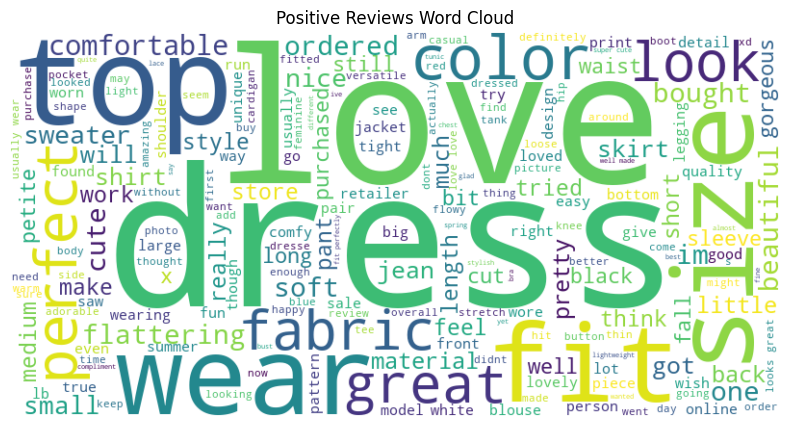

In [230]:
# Display It
plt.figure(figsize=(10,5))
plt.imshow(positive_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Reviews Word Cloud")
plt.show()

In [231]:
# PART B — WORD CLOUD FOR NEGATIVE REVIEWS

In [232]:
# Convert to Tex

negative_text = " ".join(negative_all_words)

In [233]:
# Create Word Cloud
negative_wc = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate(negative_text)

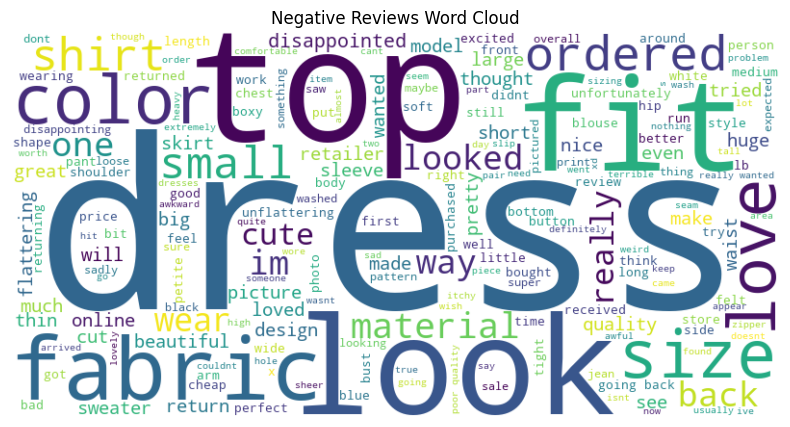

In [234]:
# Display It
plt.figure(figsize=(10,5))
plt.imshow(negative_wc, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Reviews Word Cloud")
plt.show()

In [235]:
####   STEP 2.5 – SENTIMENT ANALYSIS (FROM SCRATCH) ####
     
      # Sentiment analysis = detecting emotion from text.

In [236]:
# Step: 1 Install NLTK
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [237]:
# Step: 2 Import NLTK and Download Sentiment Dictionary

import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [238]:
# STEP 3 — Import the Sentiment Analyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [239]:
# STEP 4 — Create the Sentiment Analyzer Object

sia = SentimentIntensityAnalyzer()

In [240]:
# STEP 5 — Test Sentiment on ONE Review
  # First, take one review
df['combined_review'].iloc[0]

'absolutely wonderful silky and sexy and comfortable'

In [241]:
  # Now give that review to the sentiment analyzer
sia.polarity_scores(df['combined_review'].iloc[0])

{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'compound': 0.8932}

In [242]:
df[['Rating', 'combined_review']].iloc[0]

Rating                                                             4
combined_review    absolutely wonderful silky and sexy and comfor...
Name: 0, dtype: object

In [243]:
# STEP 6 — Apply Sentiment to ALL Reviews

df['sentiment_scores'] = df['combined_review'].apply(lambda x: sia.polarity_scores(x))

In [244]:
df[['combined_review', 'sentiment_scores']].head()

,combined_review,sentiment_scores
0,absolutely wonderful silky and sexy and comfor...,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp..."
1,love this dress its sooo pretty i happened to ...,"{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp..."
2,some major design flaws i had such high hopes ...,"{'neg': 0.026, 'neu': 0.802, 'pos': 0.172, 'co..."
3,my favorite buy i love love love this jumpsuit...,"{'neg': 0.205, 'neu': 0.363, 'pos': 0.432, 'co..."
4,flattering shirt this shirt is very flattering...,"{'neg': 0.0, 'neu': 0.689, 'pos': 0.311, 'comp..."


In [245]:
# STEP 7 — Extract Only Compound Score

In [246]:
df['compound_score'] = df['sentiment_scores'].apply(lambda x: x['compound'])

In [247]:
df[['combined_review', 'compound_score']].head()

,combined_review,compound_score
0,absolutely wonderful silky and sexy and comfor...,0.8932
1,love this dress its sooo pretty i happened to ...,0.9719
2,some major design flaws i had such high hopes ...,0.9398
3,my favorite buy i love love love this jumpsuit...,0.6276
4,flattering shirt this shirt is very flattering...,0.9308


In [248]:
# STEP 8 — Create VADER Sentiment Label

def vader_label(score):
    if score >= 0.05:
        return "Positive"
    elif score <= -0.05:
        return "Negative"
    else:
        return "Neutral"

df['vader_sentiment'] = df['compound_score'].apply(vader_label)

In [249]:
df[['compound_score', 'vader_sentiment']].head(10)

,compound_score,vader_sentiment
0,0.8932,Positive
1,0.9719,Positive
2,0.9398,Positive
3,0.6276,Positive
4,0.9308,Positive
5,0.9470,Positive
6,0.7425,Positive
7,0.0635,Positive
8,0.7351,Positive
9,-0.1037,Negative


In [250]:
# STEP 9 — Compare Rating vs VADER Sentiment

df[['Rating', 'review_type', 'vader_sentiment']].head(10)

,Rating,review_type,vader_sentiment
0,4,Positive,Positive
1,5,Positive,Positive
2,3,Neutral,Positive
3,5,Positive,Positive
4,5,Positive,Positive
5,2,Negative,Positive
6,5,Positive,Positive
7,4,Positive,Positive
8,5,Positive,Positive
9,5,Positive,Negative


In [251]:
# Count How Many Match / Mismatch
df[df['review_type'] != df['vader_sentiment']].shape

(4822, 17)

In [252]:
# Let’s See Some Mismatch Examples

df[df['review_type'] != df['vader_sentiment']][
    ['Rating', 'combined_review', 'review_type', 'vader_sentiment']
].head(5)

,Rating,combined_review,review_type,vader_sentiment
2,3,some major design flaws i had such high hopes ...,Neutral,Positive
5,2,not for the very petite i love tracy reese dre...,Negative,Positive
9,5,such a fun dress im and lbs i ordered the s pe...,Positive,Negative
10,3,dress looks like its made of cheap material dr...,Neutral,Positive
14,3,pretty party dress with some issues this is a ...,Neutral,Positive


In [253]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
df=pd.read_excel("../data/Womens Clothing Reviews Data.xlsx")


In [255]:
#### PHASE : 3  Topic Modelling

# STEP 3.1 – VECTORIZATION (Convert Text → Numbers)

In [256]:
# 1 — Import Required Library

from sklearn.feature_extraction.text import CountVectorizer

In [257]:
# 2 - Define CountVectorizer

vectorizer = CountVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=5
)

In [258]:
df['combined_review'] = (
    df['Review Title'].fillna('') + ' ' + df['Review Text'].fillna('')
)

df['combined_review'] = df['combined_review'].str.lower()

In [259]:
print('combined_review' in df.columns)

True


In [260]:
dtm = vectorizer.fit_transform(df['combined_review'])

In [261]:
print(df.columns)

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'combined_review'],
      dtype='object')


In [262]:
dtm.shape

(23486, 4774)

In [263]:
# STEP 3.3 – APPLY LDA (Latent Dirichlet Allocation)

In [264]:
# 1 Import LDA

from sklearn.decomposition import LatentDirichletAllocation

In [265]:
# 2 Create LDA Model

lda_model = LatentDirichletAllocation(
    n_components=5,
    random_state=42
)

In [266]:
# 3 – Fit LDA Model to Data
lda_model.fit(dtm)

,"n_components n_components: int, default=10Number of topics... versionchanged:: 0.19 ``n_topics`` was renamed to ``n_components``",5
,"doc_topic_prior doc_topic_prior: float, default=NonePrior of document topic distribution `theta`. If the value is None,defaults to `1 / n_components`.In [1]_, this is called `alpha`.",None
,"topic_word_prior topic_word_prior: float, default=NonePrior of topic word distribution `beta`. If the value is None, defaultsto `1 / n_components`.In [1]_, this is called `eta`.",None
,"learning_method learning_method: {'batch', 'online'}, default='batch'Method used to update `_component`. Only used in :meth:`fit` method.In general, if the data size is large, the online update will be muchfaster than the batch update.Valid options:- 'batch': Batch variational Bayes method. Use all training data in each EM update. Old `components_` will be overwritten in each iteration.- 'online': Online variational Bayes method. In each EM update, use mini-batch of training data to update the ``components_`` variable incrementally. The learning rate is controlled by the ``learning_decay`` and the ``learning_offset`` parameters... versionchanged:: 0.20 The default learning method is now ``""batch""``.",'batch'
,"learning_decay learning_decay: float, default=0.7It is a parameter that control learning rate in the online learningmethod. The value should be set between (0.5, 1.0] to guaranteeasymptotic convergence. When the value is 0.0 and batch_size is``n_samples``, the update method is same as batch learning. In theliterature, this is called kappa.",0.7
,"learning_offset learning_offset: float, default=10.0A (positive) parameter that downweights early iterations in onlinelearning. It should be greater than 1.0. In the literature, this iscalled tau_0.",10.0
,"max_iter max_iter: int, default=10The maximum number of passes over the training data (aka epochs).It only impacts the behavior in the :meth:`fit` method, and not the:meth:`partial_fit` method.",10
,"batch_size batch_size: int, default=128Number of documents to use in each EM iteration. Only used in onlinelearning.",128
,"evaluate_every evaluate_every: int, default=-1How often to evaluate perplexity. Only used in `fit` method.set it to 0 or negative number to not evaluate perplexity intraining at all. Evaluating perplexity can help you check convergencein training process, but it will also increase total training time.Evaluating perplexity in every iteration might increase training timeup to two-fold.",-1
,"total_samples total_samples: int, default=1e6Total number of documents. Only used in the :meth:`partial_fit` method.",1000000.0
,"perp_tol perp_tol: float, default=1e-1Perplexity tolerance. Only used when ``evaluate_every`` is greater than 0.",0.1


In [267]:
# STEP 3.4 – EXTRACT TOPICS (Top Words per Topic)

In [268]:
# 1 – Get Vocabulary (Feature Names)

feature_names = vectorizer.get_feature_names_out()

In [269]:
# 2 – Print Top Words Per Topic

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic {topic_idx + 1}:")
    print([feature_names[i] for i in topic.argsort()[:-11:-1]])


Topic 1:
['love', 'jeans', 'great', 'wear', 'pants', 'perfect', 'like', 'soft', 'fit', 'just']

Topic 2:
['love', 'great', 'wear', 'color', 'perfect', 'comfortable', 'summer', 'dress', 'cute', 'colors']

Topic 3:
['like', 'sweater', 'small', 'shirt', 'cute', 'fit', 'nice', 'fabric', 'just', 'really']

Topic 4:
['dress', '_x000d_', 'like', 'fabric', 'fit', 'just', 'waist', 'flattering', 'beautiful', 'skirt']

Topic 5:
['size', 'small', 'fit', 'ordered', 'store', 'dress', 'love', 'large', 'tried', 'wear']


In [270]:
## STEP 3.6 – Assign Dominant Topic to Each Review

In [271]:
# 1 Get Topic Distribution Per Review

topic_distribution = lda_model.transform(dtm)

In [272]:
topic_distribution.shape

(23486, 5)

In [273]:
# 2 – Assign Dominant Topic

df['dominant_topic'] = topic_distribution.argmax(axis=1)

In [274]:
# 3 – Make Topic Number Human-Friendly

df['dominant_topic'] = df['dominant_topic'] + 1

In [275]:
df[['combined_review', 'dominant_topic']].head()


,combined_review,dominant_topic
0,absolutely wonderful - silky and sexy and com...,2
1,love this dress! it's sooo pretty. i happen...,5
2,some major design flaws i had such high hopes ...,4
3,"my favorite buy! i love, love, love this jumps...",2
4,flattering shirt this shirt is very flattering...,2


In [276]:
## STEP 3.7 – Analyze Topic Distribution

In [277]:
# 1 Count Reviews Per Topic
df['dominant_topic'].value_counts().sort_index()

dominant_topic
1    4335
2    5422
3    4717
4    4823
5    4189
Name: count, dtype: int64

In [278]:
# STEP 3.8 – Connect Topics with Sentiment

In [279]:
print(df.columns.tolist())


['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location', 'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating', 'Recommend Flag', 'combined_review', 'dominant_topic']


In [280]:
# Create Rating-Based Sentiment
df['review_type'] = df['Rating'].apply(
    lambda x: 'Positive' if x >= 4 
    else ('Neutral' if x == 3 else 'Negative')
)

In [281]:
print(df.columns)

Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'combined_review', 'dominant_topic', 'review_type'],
      dtype='object')


In [282]:
# Topic vs Rating-Based Sentiment
pd.crosstab(df['dominant_topic'], df['review_type'])

review_type,Negative,Neutral,Positive
dominant_topic,,,
1,334,272,3729
2,53,118,5251
3,903,1064,2750
4,662,881,3280
5,455,536,3198


In [283]:
print(df.columns)


Index(['Product ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer Age', 'Review Title', 'Review Text', 'Rating',
       'Recommend Flag', 'combined_review', 'dominant_topic', 'review_type'],
      dtype='object')


In [284]:
## Create Compound Score (MOST IMPORTANT)
df['compound_score'] = df['combined_review'].apply(
    lambda text: sia.polarity_scores(text)['compound']
)

In [285]:
# Create Sentiment Label
df['vader_sentiment'] = df['compound_score'].apply(vader_label)

In [286]:
df[['compound_score', 'vader_sentiment']].head()


,compound_score,vader_sentiment
0,0.8932,Positive
1,0.9729,Positive
2,0.9427,Positive
3,0.7182,Positive
4,0.9407,Positive


In [287]:
# STEP 3.9 – Topic vs NLP Sentiment (Optional but Powerful)
pd.crosstab(df['dominant_topic'], df['vader_sentiment'])

vader_sentiment,Negative,Neutral,Positive
dominant_topic,,,
1,145,861,3329
2,36,8,5378
3,464,75,4178
4,378,44,4401
5,253,44,3892


In [288]:
#### PHASE : 4 Predictive Modeling

In [289]:
# STEP 4.1 – Define Target Variable (y)

In [290]:
# 1 – Check Target Values
df['Recommend Flag'].value_counts()

Recommend Flag
1    19314
0     4172
Name: count, dtype: int64

In [291]:
# STEP 4.2 – Define Features (X) and Target (y)
y = df['Recommend Flag']

In [292]:
X = df['combined_review']

In [293]:
print(X.shape)

(23486,)


In [294]:
print(y.shape)

(23486,)


In [295]:
# 4.3 – Train-Test Split

In [296]:
# 1 – Import Train-Test Split
from sklearn.model_selection import train_test_split

In [297]:
# 2 – Perform Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [298]:
print("Training size:", X_train.shape)
print("Testing size:", X_test.shape)

Training size: (18788,)
Testing size: (4698,)


In [299]:
# STEP 4.4 – TF-IDF Vectorization

In [300]:
# 1 – Import TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

In [301]:
# 2 – Create TF-IDF Object
tfidf = TfidfVectorizer(
    stop_words='english',
    max_df=0.95,
    min_df=5
)

In [302]:
# 3 – Fit on Training Data ONLY
X_train_tfidf = tfidf.fit_transform(X_train)

In [303]:
# 4 – Transform Test Data
X_test_tfidf = tfidf.transform(X_test)

In [304]:
print("Train shape:", X_train_tfidf.shape)
print("Test shape:", X_test_tfidf.shape)

Train shape: (18788, 4297)
Test shape: (4698, 4297)


In [305]:
# STEP 4.5 – Train Logistic Regression Model

In [306]:
# 1 – Import Logistic Regression
from sklearn.linear_model import LogisticRegression

In [307]:
# 2 – Create Model
model = LogisticRegression(max_iter=1000)

In [308]:
# 3 – Train the Model
model.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [309]:
# STEP 4.6 – Make Predictions

In [310]:
# 1 – Predict on Test Data
y_pred = model.predict(X_test_tfidf)

In [311]:
#  Step 4.7 – Evaluate Model Performance

In [312]:
# 1 – Import Evaluation Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [313]:
# 2 – Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8950617283950617


In [314]:
# 3 – Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[ 464  387]
 [ 106 3741]]


In [315]:
# 4 Full Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.55      0.65       851
           1       0.91      0.97      0.94      3847

    accuracy                           0.90      4698
   macro avg       0.86      0.76      0.80      4698
weighted avg       0.89      0.90      0.89      4698



In [316]:
# STEP 4.8 – Retrain Logistic Regression with Class Weight ( as above Model is weak at detecting unhappy customers (class 0)

In [317]:
# 1 – Create Balanced Model
model_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

In [318]:
# 2 – Train Model Again
model_balanced.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [319]:
# 3 – Make Predictions
y_pred_balanced = model_balanced.predict(X_test_tfidf)

In [320]:
# 4 – Evaluate Again
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.63      0.83      0.72       851
           1       0.96      0.89      0.93      3847

    accuracy                           0.88      4698
   macro avg       0.80      0.86      0.82      4698
weighted avg       0.90      0.88      0.89      4698



In [321]:
## ADVANCE COMPLETION 

In [322]:
# STEP 1 – Add Structured Features (Age + Rating)

In [323]:
# 1 – Import Required Tool
from scipy.sparse import hstack

In [324]:
# 2 – Prepare Numerical Features
X_train_num = X_train.index.map(df['Customer Age']).values.reshape(-1,1)
X_test_num = X_test.index.map(df['Customer Age']).values.reshape(-1,1)

X_train_rating = X_train.index.map(df['Rating']).values.reshape(-1,1)
X_test_rating = X_test.index.map(df['Rating']).values.reshape(-1,1)


In [325]:
# 3 – Combine Numerical Features
X_train_struct = np.hstack((X_train_num, X_train_rating))
X_test_struct = np.hstack((X_test_num, X_test_rating))

In [326]:
# 4 – Combine Text + Structured Features
X_train_combined = hstack([X_train_tfidf, X_train_struct])
X_test_combined = hstack([X_test_tfidf, X_test_struct])

In [327]:
# 5 – Train Logistic Regression Again
model_combined = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model_combined.fit(X_train_combined, y_train)

y_pred_combined = model_combined.predict(X_test_combined)

print(classification_report(y_test, y_pred_combined))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       851
           1       0.99      0.93      0.96      3847

    accuracy                           0.93      4698
   macro avg       0.87      0.94      0.90      4698
weighted avg       0.94      0.93      0.94      4698



In [328]:
# STEP 2 – Try Random Forest (Classification)

In [329]:
# 1 – Import Random Forest
from sklearn.ensemble import RandomForestClassifier

In [330]:
# 2 – Create Random Forest Model

rf_model_text = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)


In [331]:
# 3 – Train Model
rf_model_text.fit(X_train_tfidf, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [332]:
rf_model_text.n_features_in_

4297

In [333]:
# 4 – Make Predictions
y_pred_rf = rf_model_text.predict(X_test_tfidf)

In [334]:
# 5 – Evaluate
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.81      0.41      0.55       851
           1       0.88      0.98      0.93      3847

    accuracy                           0.88      4698
   macro avg       0.85      0.70      0.74      4698
weighted avg       0.87      0.88      0.86      4698



In [335]:
print(type(X_train_tfidf))
print(X_train_tfidf.shape)

<class 'scipy.sparse._csr.csr_matrix'>
(18788, 4297)


In [336]:
X_train_tfidf.shape

(18788, 4297)

In [337]:
# Step:3 Predict Rating (Regression Problem)

In [338]:
y = 'Rating'

In [339]:
# 1 – Define New Target
y_rating = df['Rating']

In [340]:
# 2 – Train-Test Split Again
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, 
    y_rating,
    test_size=0.2,
    random_state=42
)

In [341]:
# 3 – TF-IDF Again
X_train_tfidf_r = tfidf.fit_transform(X_train_r)
X_test_tfidf_r = tfidf.transform(X_test_r)

In [342]:
# 4 – Import Regression Model
from sklearn.linear_model import LinearRegression

In [343]:
# 5 – Train Model
reg_model = LinearRegression()
reg_model.fit(X_train_tfidf_r, y_train_r)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [344]:
# 6 – Predict
y_pred_r = reg_model.predict(X_test_tfidf_r)

In [345]:
# 7 – Evaluate Regression
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test_r, y_pred_r)
mse = mean_squared_error(y_test_r, y_pred_r)

print("MAE:", mae)
print("MSE:", mse)

MAE: 0.6306190157180868
MSE: 0.6848770296097746


In [346]:
import joblib

joblib.dump(rf_model_text, "rf_model_text.pkl")
joblib.dump(tfidf, "tfidf_vectorizer.pkl")

print("Saved correctly")


Saved correctly


In [347]:
import joblib

joblib.dump(lda_model, "../models/lda_model.pkl")
joblib.dump(vectorizer, "../models/count_vectorizer.pkl")

print("LDA model and CountVectorizer saved successfully.")


LDA model and CountVectorizer saved successfully.


In [348]:
import os
print(os.getcwd())

c:\Users\dell\Desktop\Customer_review_NLP_Pipeline\customer-review-nlp-pipeline\notebooks


In [349]:
rf_model_text.n_features_in_

4297

In [350]:
import sys
print(sys.executable)


c:\Users\dell\Desktop\Customer_review_NLP_Pipeline\.venv\Scripts\python.exe


In [351]:
%pip install matplotlib seaborn wordcloud


Note: you may need to restart the kernel to use updated packages.


In [352]:
print(X_train_tfidf.shape)
print(X_test_tfidf.shape)

(18788, 4297)
(4698, 4297)


In [353]:
df.to_csv("processed_reviews.csv", index=False)
